# PANDUAN PRAKTIS PENGGUNAAN PANDAS - BAGIAN 2

Pandas adalah sebuah paket library pada python yang digunakan untuk mempermudah dalam mengolah dan menganalisa data-data terstruktur. Pandas merupakan paket penting yang wajib diketahui untuk seorang data engineer, data analyst dan data scientist jika ingin mengolah dan manganalisa data menggunakan python.

Ini adalah bagian kedua dari seri Panduan Praktis Penggunaan Pandas. Pada bagian sebelumnya, telah dipelajari tentang cara membaca data, mendapatkan informasi struktur data, memfilter, dan mengurutkan data. Bagian 1 dapat diakses melalui link berikut [link](https://github.com/project303/Ngulik-Big-Data/blob/master/Panduan-Praktis-Penggunaan-Pandas--Bagian-1.ipynb)

Yuk kita selesaikan materi ini supaya dapat segera beraksi menggunakan Pandas !

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/project303/dataset/master/data-province-2015.cvs"
df = pd.read_csv(url, sep='\t')

## Summarising Data

Pandas menyediakan fungsi statistik agregasi, seperti count, sum, min, max dan lainnya. Fungsi-fungsi ini dapat diterapkan ke kolom. Misalnya fungsi **count()** seperti yang telah sedikit dibahas pada bagian pertama tulisan ini. Fungsi ini dapat digunakan untuk menghitung jumlah record untuk setiap kolom.

In [2]:
df.count()

province                34
rainfall                34
rainy_day               34
expenses_food_urban     34
expenses_other_urban    34
expenses_food_rural     34
expense_other_rural     34
unemployment            34
time_zone               34
island                  34
dtype: int64

Perlu diingat, bahwa fungsi **count()** hanya menghitung untuk record yang tidak bernilai null. Pada contoh jumlah record untuk setiap kolom adalah sama yaitu 34 dan tidak ada yang memiliki nilai null

Untuk menghitung jumlah record pada sebuah kolom dapat menggunakan perintah berikut

In [3]:
df.rainfall.count()

34

atau dapat juga ditulis seperti berikut

In [4]:
df['rainfall'].count()

34

Fungsi lain seperti **sum()**, **min()**, **max()**, **mean()** dan lain-lain, hampir sama cara penggunaannya

In [5]:
df.sum()

province                AcehSumatera UtaraSumatera BaratRiauJambiSumat...
rainfall                                                          63615.1
rainy_day                                                            4909
expenses_food_urban                                              16189922
expenses_other_urban                                             20277168
expenses_food_rural     3951364130874479444727564128713583914037233591...
expense_other_rural     2601832694073191434139293493292609233266562947...
unemployment                                                       203.32
time_zone                                                              54
island                  SumateraSumateraSumateraSumateraSumateraSumate...
dtype: object

Pada contoh diatas terlihat sesuatu yang agak berbeda, yaitu kolom **province** dan **island**. Ini terjadi karena kolom tersebut bukan bernilai numerik

Penggunaan lain dari fungsi statistik dapat dilihat sebagai berikut:

In [6]:
print('Total rainfall \t\t:', df.rainfall.sum())
print('Minimum rainfall value \t:', df.rainfall.min())
print('Maximum rainfall value \t:', df.rainfall.max())
print('Average rainfall value \t:', df.rainfall.mean())

Total rainfall 		: 63615.1
Minimum rainfall value 	: 460.9
Maximum rainfall value 	: 3548.0
Average rainfall value 	: 1871.0323529411764


## Grouping

Pandas memiliki fungsi **groupby()** untuk melakukan perhitungan kelompok berdasarkan nilai unik sesuai kolom yang dipilih. Sebagai contoh, akan dilakukan perhitungan jumlah records kolom **time_zone** dikelompokkan berdasarkan nilai uniknya

In [7]:
df.groupby('time_zone').count()

,province,rainfall,rainy_day,expenses_food_urban,expenses_other_urban,expenses_food_rural,expense_other_rural,unemployment,island
time_zone,,,,,,,,,
1,18,18,18,18,18,18,18,18,18
2,12,12,12,12,12,12,12,12,12
3,4,4,4,4,4,4,4,4,4


Dari data diatas, terlihat bahwa time_zone memiliki 3 nilai unik yaitu 1, 2 dan 3

Jika ingin hannya menampilkan kolom tertentu, dapat dituliskan sepeti berikut

In [8]:
df.groupby("time_zone")["province"].count()

time_zone
1    18
2    12
3     4
Name: province, dtype: int64

Fungsi summary lain seperti sum, min, max, mean, first, last dapat digunakan pada fungsi **groupby()** untuk mendapatkan nilai statistik setiap kelompok. Misalkan kita ingin mendapatkan nilai yang pertama untuk setiap time_zone

In [9]:
df.groupby('time_zone').first()

,province,rainfall,rainy_day,expenses_food_urban,expenses_other_urban,expenses_food_rural,expense_other_rural,unemployment,island
time_zone,,,,,,,,,
1,Aceh,1575.0,146,466355,529945,395136,260183,9.93,Sumatera
2,Bali,1133.8,124,441921,737657,389091,441381,1.99,Bali
3,Maluku,1987.2,167,486374,511825,378946,285648,9.93,Maluku


Menghitung rata-rata rainfall untuk setiap time_zone

In [10]:
df.groupby('time_zone')[['rainfall']].mean()

,rainfall
time_zone,
1,2041.544444
2,1654.683333
3,1752.775000


Fungsi **groupby()** dapat digabungkan dengan fungsi **agg()**. Sebagai contoh, mengihtung rata-rata **rainfall** untuk setiap **time_zone**

In [11]:
df.groupby('time_zone').agg(avg_rainfall=('rainfall', 'mean'))

,avg_rainfall
time_zone,
1,2041.544444
2,1654.683333
3,1752.775000


Untuk melakukan bebrapa perhitungan statistik yang dikelompokkan berdasarkan nilai unik sebuah kolom, dapat dilakukan sebagai berikut

In [12]:
df.groupby('time_zone').agg(
    avg_rainfall=('rainfall', 'mean'),
    max_rainfall=('rainfall', 'max'),
    min_rainfall=('rainfall', 'min'))

,avg_rainfall,max_rainfall,min_rainfall
time_zone,,,
1,2041.544444,3548.0,975.9
2,1654.683333,3382.0,460.9
3,1752.775000,2844.6,913.4


Perhitungan aggregasi untuk kolom yang berbeda

In [13]:
df.groupby('time_zone').agg(
    avg_rainfall=('rainfall', 'mean'),
    min_rainy_day=('rainy_day', 'min'),
    max_rainy_day=('rainy_day', 'max'))

,avg_rainfall,min_rainy_day,max_rainy_day
time_zone,,,
1,2041.544444,105,215
2,1654.683333,68,202
3,1752.775000,127,218


Supaya kolom time_zone tidak ditampilkan sebagai index, maka parameter **as_index** diset **False**

In [14]:
df.groupby('time_zone', as_index=False).agg(
    avg_rainfall=('rainfall', 'mean'),
    min_rainy_day=('rainy_day', 'min'),
    max_rainy_day=('rainy_day', 'max'))

,time_zone,avg_rainfall,min_rainy_day,max_rainy_day
0,1,2041.544444,105,215
1,2,1654.683333,68,202
2,3,1752.775000,127,218


## Transformasi kolom

Salah satu hal yang sering dilakukan juga adalah menambahkan kolom baru dari hasil terhitungan tertentu. Sebagai contoh  kolom **expenses_urban** adalah hasil penjumlahan kolom expenses_food_urban dan expenses_other_urban

In [15]:
df['expenses_urban'] = df['expenses_food_urban'] + df['expenses_other_urban']

df[['province', 'island', 'expenses_urban', 'expenses_food_urban', 'expenses_other_urban']].head()

,province,island,expenses_urban,expenses_food_urban,expenses_other_urban
0,Aceh,Sumatera,996300,466355,529945
1,Sumatera Utara,Sumatera,869682,416073,453609
2,Sumatera Barat,Sumatera,1088499,509609,578890
3,Riau,Sumatera,1192509,530836,661673
4,Jambi,Sumatera,1020731,464204,556527


In [16]:
df.count()

province                34
rainfall                34
rainy_day               34
expenses_food_urban     34
expenses_other_urban    34
expenses_food_rural     34
expense_other_rural     34
unemployment            34
time_zone               34
island                  34
expenses_urban          34
dtype: int64

Untuk melakukan penghapusan kolom dapat dilakukan dengan perintah **drop()**

In [17]:
df = df.drop(columns=['expenses_urban'])

In [18]:
df.count()

province                34
rainfall                34
rainy_day               34
expenses_food_urban     34
expenses_other_urban    34
expenses_food_rural     34
expense_other_rural     34
unemployment            34
time_zone               34
island                  34
dtype: int64

Merubah nama kolom, misalkan kedalam bahasa Indonesia

In [19]:
df.rename(
            columns={"province": "propinsi", "rainfall": "curah_hujan"},
            inplace = True)

df.count()

propinsi                34
curah_hujan             34
rainy_day               34
expenses_food_urban     34
expenses_other_urban    34
expenses_food_rural     34
expense_other_rural     34
unemployment            34
time_zone               34
island                  34
dtype: int64

## Join dengan data referensi

Pada banyak kasus, kita sering menambahkan kolom dengan data yang baru menggunakan data referensi. Penggunaan data referensi biasanya untuk mempermudah maintenance data, sehingga kita tidak perlu mengubah kode. Sebagai contoh, kita akan menambahkan nama zona, dari data referensi zona waktu.

In [20]:
time_zone_data = {
        'time_zone': [1, 2, 3],
        'name_zone': ['WIB', 'WITA', 'WIT']}

time_zone_df = pd.DataFrame(time_zone_data, columns = ['time_zone', 'name_zone'])
time_zone_df

,time_zone,name_zone
0,1,WIB
1,2,WITA
2,3,WIT


Pada kasus nyata, tidak menggunakan data referensi yang dibuat menggunakan **kode** seperti diatas. Data referensi diperoleh dari database, baik dalam bentuk file ataupun koneksi langsung ke database. 

DataFrame diatas memiliki 2 kolom yaitu time_zone yang memiliki type int64 sesuai dengan kolom time_zone pada dataframe **df**. Kolom kedua adalah nama dari name_zone.

Pada contoh ini akan mentransformasikan **time_zone** pada dataframe **df** dengan menambahkan kolom baru yaitu **name_zone**. Fungsi yang digunakan adalah **merge** dengan parameter **how='left'**. Artinya adalah kita akan melakukan **left join** antara **df** dan **time_zone_df**

In [21]:
result_df = pd.merge(df, time_zone_df, on='time_zone', how='left')

result_df[['propinsi', 'curah_hujan', 'time_zone', 'name_zone']].head()

,propinsi,curah_hujan,time_zone,name_zone
0,Aceh,1575.0,1,WIB
1,Sumatera Utara,975.9,1,WIB
2,Sumatera Barat,3548.0,1,WIB
3,Riau,2048.3,1,WIB
4,Jambi,1694.9,1,WIB


## Data Visualisasi

Untuk memvisualisasikan DataFrame kedalam bentuk grafik, dapat menggunakan fungsi **plot()**, yang secara default menggunakan matplotlib

Contoh dibawah menampilkan grafik garis untuk x adalah propinsi dan y adalah curah hujan

In [22]:
%matplotlib inline

C:\Users\bobkribo\anaconda3\envs\Ngulik Big Data\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='propinsi'>

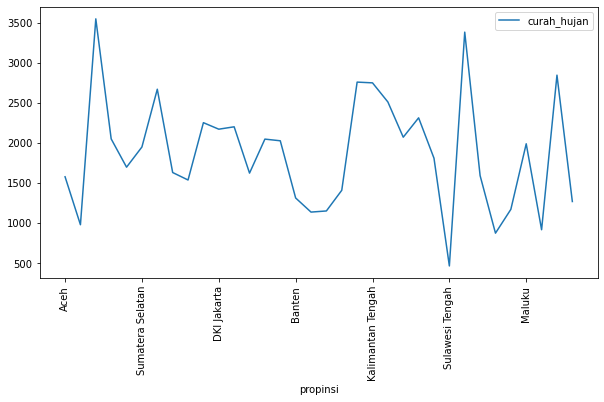

In [23]:
result_df.plot(x="propinsi", y="curah_hujan", rot=90, figsize=(10,5))

Fungsi plot() juga dapat digabungkan dengan fungsi-fungsi aggregasi atau summary

<AxesSubplot:xlabel='time_zone'>

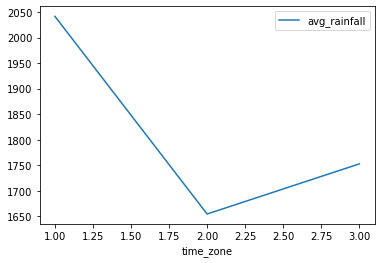

In [24]:
result_df.groupby(['time_zone', 'name_zone'], as_index=False).agg(avg_rainfall=('curah_hujan', 'mean'))\
    .plot(x="time_zone", y="avg_rainfall")

Data ditampilkan dalam bentuk grafik batang

<AxesSubplot:xlabel='name_zone'>

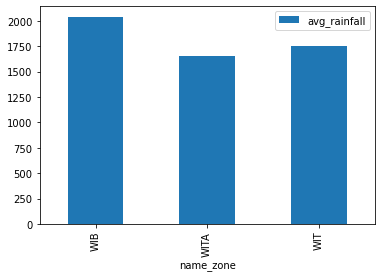

In [25]:
result_df.groupby(['time_zone', 'name_zone'], as_index=False).agg(avg_rainfall=('curah_hujan', 'mean'))\
    .plot(x="name_zone", y="avg_rainfall", kind="bar")

## Penutup

Membaca data, memeriksa, memfilter, mentransformasi dan melakukan join dengan menggunakan Pandas pada python merupakan hal penting dan sering dilakukan oleh seorang data scientist, data analyts maupun data engineer. Mencoba dengan dataset yang lebih komplek merupakan latihan yang dapat membantu untuk membiasakan diri mengolah data menggunakan Pandas.

Artikel ini juga diposting pada [medium](https://medium.com/@sigit303/fastest-way-to-learn-pandas-a-practical-guide-part-1-2720a2d723e0)

Versi notebook dapat diakses pada [github](https://github.com/project303/Ngulik-Big-Data/blob/master/Panduan-Praktis-Penggunaan-Pandas--Bagian-2.ipynb)

Untuk yang belum pernah menggunakan Python dapat membaca [Berkenalan dengan Python](https://github.com/project303/Ngulik-Big-Data/blob/master/Berkenalan%20dengan%20Python.ipynb)


Untuk pelajaran lebih lanjut bisa mengunjungi 

https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html


**Enjoy learning and have fun with data !**